In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras import backend as K
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization,LeakyReLU,Dense
from keras.layers import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import set_random_seed
from tensorflow.python.keras import backend as K

set_random_seed(123)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)
set_random_seed(2)
np.random.seed(1)

(224, 224, 3)

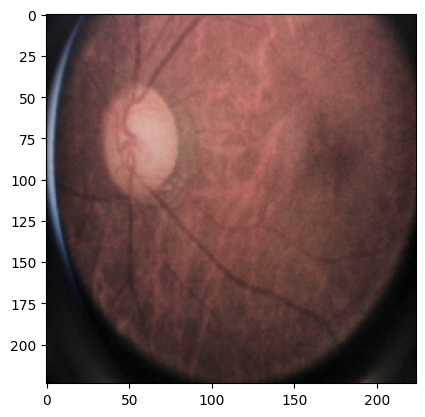

In [ ]:
ImagePath="/content/drive/MyDrive/color-project-saved-data/"
img___ = cv2.imread(ImagePath+'Y/' + "11.png")
img___ = cv2.cvtColor(img___,cv2.COLOR_BGR2RGB)
img___ = cv2.resize(img___, (224, 224))
plt.imshow(img___)
img___.shape

In [ ]:
HEIGHT=224
WIDTH=224
def ExtractInput(path):
    X_img=[]
    y_img=[]
    for imageDir in os.listdir(ImagePath+'X/'):
        try:
            img_X = cv2.imread(ImagePath + 'X/' + imageDir)
            img_X = cv2.cvtColor(img_X, cv2.COLOR_BGR2RGB)

            img_X = img_X.astype(np.float32)
            img_X_rs = cv2.resize(img_X, (WIDTH, HEIGHT))

            img_X = img_X_rs/128

            X_img.append(img_X)
        except:
            pass

    for imageDir in os.listdir(ImagePath+'Y/'):
        try:
            img_y = cv2.imread(ImagePath + 'Y/' + imageDir)
            img_y = cv2.cvtColor(img_y, cv2.COLOR_BGR2RGB)

            img_y = img_y.astype(np.float32)
            img_y_rs = cv2.resize(img_y, (WIDTH, HEIGHT))

            img_y = img_y_rs/128

            y_img.append(img_y)
        except:
            pass
    X_img = np.array(X_img)
    y_img = np.array(y_img)

    return X_img,y_img



In [ ]:
X_,y_ = ExtractInput(ImagePath)

(290, 224, 224, 3)
(290, 224, 224, 3)


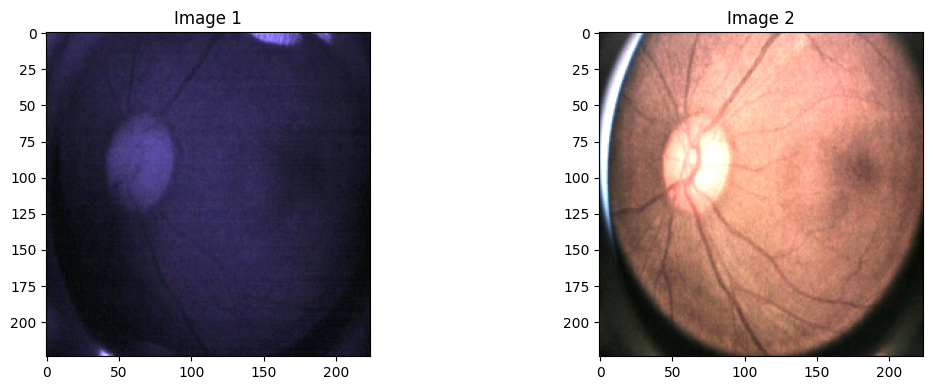

In [ ]:
print(X_.shape)
print(y_.shape)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(X_[47], cmap='gray')
axes[0].set_title('Image 1')

axes[1].imshow(y_[47], cmap='gray')
axes[1].set_title('Image 2')


# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

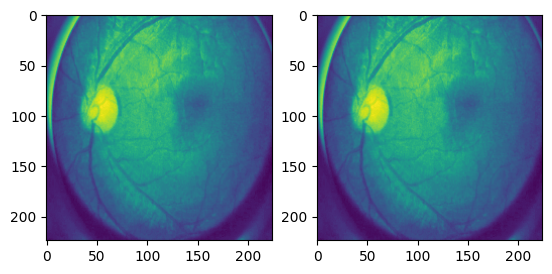

In [ ]:
chan1_y = (y_[:,:,:,0])
chan2_y = (y_[:,:,:,1])
chan3_y = (y_[:,:,:,2])


chan1_X = (X_[:,:,:,0])
chan2_X = (X_[:,:,:,1])
chan3_X = (X_[:,:,:,2])

f, axarr = plt.subplots(1,2)
axarr[0].imshow(y_[1][:,:,0])
axarr[1].imshow(chan1_y[1])

In [ ]:
model1 = tf.keras.models.Sequential()

# first convolutional block nf1 = 16 nk = 3x3
# each block consists of 3 convolution layers
model1.add(  Conv2D( 16, kernel_size=(3,3) ,input_shape = (224, 224, 1),padding = 'same',activation='relu'  ))
model1.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu'  ))
model1.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu' ))


# #first pooling layer   size = 2x2
model1.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#print(ip_shape)

#second convolutional block nf2 = 32,nk= 3x3
# each block consists of 3 convolution layers
model1.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model1.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model1.add(  Conv2D( 32, kernel_size=(3,3) ,padding = 'same',activation='relu'))



#second pooling layer   size = 2x2
model1.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#third and final convolutional block nf3= 64,nk = 3x3
# each block consists of 3 convolution layers
model1.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model1.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model1.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu'))





model1.add(Dense(1, activation='relu') )

# print model summary
print(model1.summary())

# #fully connected layer
print(model1.output_shape)
#model1.add(Flatten())
print(model1.input_shape)



# # train!!

model1.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])

#model1.fit(x = bw_data, y = col_data , epochs = 5 , verbose = 2 , validation_split = 0)
model1.fit(x = chan1_X, y = chan1_y , epochs = 25 , verbose = 2 , validation_split = 0.02)
model1.save('/content/drive/My Drive/run0modelR.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 224, 224, 16)      160       
                                                                 
 conv2d_28 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 conv2d_29 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 224, 224, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 224, 224, 32)      4640      
                                                                 
 conv2d_31 (Conv2D)          (None, 224, 224, 32)      9248      
                                                      

None
(None, 224, 224, 1)
(None, 224, 224, 1)
Epoch 1/25
9/9 - 6s - loss: 0.4334 - accuracy: 2.5319e-04 - val_loss: 0.0922 - val_accuracy: 4.6171e-04 - 6s/epoch - 667ms/step
Epoch 2/25
9/9 - 4s - loss: 0.1333 - accuracy: 7.3523e-04 - val_loss: 0.1161 - val_accuracy: 1.4947e-04 - 4s/epoch - 413ms/step
Epoch 3/25
9/9 - 4s - loss: 0.1180 - accuracy: 7.3797e-04 - val_loss: 0.1396 - val_accuracy: 4.7167e-04 - 4s/epoch - 418ms/step
Epoch 4/25
9/9 - 4s - loss: 0.1223 - accuracy: 7.3565e-04 - val_loss: 0.0721 - val_accuracy: 4.4842e-04 - 4s/epoch - 423ms/step
Epoch 5/25
9/9 - 4s - loss: 0.1206 - accuracy: 7.3284e-04 - val_loss: 0.0848 - val_accuracy: 4.6835e-04 - 4s/epoch - 422ms/step
Epoch 6/25
9/9 - 4s - loss: 0.1531 - accuracy: 6.9516e-04 - val_loss: 0.0657 - val_accuracy: 4.5839e-04 - 4s/epoch - 426ms/step
Epoch 7/25
9/9 - 4s - loss: 0.1055 - accuracy: 7.7684e-04 - val_loss: 0.0899 - val_accuracy: 4.7167e-04 - 4s/epoch - 432ms/step
Epoch 8/25
9/9 - 4s - loss: 0.1036 - accuracy: 7.8786e-04 -

In [ ]:
model2 = tf.keras.models.Sequential()


# first convolutional block nf1 = 16 nk = 3x3

model2.add(  Conv2D( 16, kernel_size=(3,3) ,input_shape = (224, 224, 1),padding = 'same',activation='relu'  ))
model2.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu'  ))
model2.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu' ))


# #first pooling layer   size = 2x2
model2.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#print(ip_shape)

#second convolutional block nf2 = 32,nk= 3x3
model2.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model2.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model2.add(  Conv2D( 32, kernel_size=(3,3) ,padding = 'same',activation='relu'))



#second pooling layer   size = 2x2
model2.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#third and final convolutional block nf3= 64,nk = 3x3
model2.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model2.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model2.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu'))





model2.add( Dense(1, activation='relu') )
print(model2.summary())

# #fully connected layer
print(model2.output_shape)
#model.add(Flatten())
print(model2.input_shape)



# # train!!
model2.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001),metrics=['accuracy'])
#model.fit(x = bw_data, y = col_data , epochs = 5 , verbose = 2 , validation_split = 0)
model2.fit(x = chan2_X, y = chan2_y , epochs = 25 , verbose = 2 , validation_split = 0.02)
model2.save('/content/drive/My Drive/run0modelG.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 224, 224, 16)      160       
                                                                 
 conv2d_37 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 conv2d_38 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 224, 224, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 224, 224, 32)      4640      
                                                                 
 conv2d_40 (Conv2D)          (None, 224, 224, 32)      9248      
                                                      

In [ ]:
model3 = tf.keras.models.Sequential()

# first convolutional block nf1 = 16 nk = 3x3

model3.add(  Conv2D( 16, kernel_size=(3,3) ,input_shape = (224, 224, 1),padding = 'same',activation='relu'  ))   # add input_shape = X.shape()
model3.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu'  ))   # add input_shape = X.shape()
model3.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu' ))   # add input_shape = X.shape()


# #first pooling layer   size = 2x2
model3.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#print(ip_shape)

#second convolutional block nf2 = 32,nk= 3x3
model3.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model3.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model3.add(  Conv2D( 32, kernel_size=(3,3) ,padding = 'same',activation='relu'))



#second pooling layer   size = 2x2
model3.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#third and final convolutional block nf3= 64,nk = 3x3
model3.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model3.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model3.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu'))





model3.add( Dense(1, activation='relu') )

#print model summary
print(model3.summary())

# #fully connected layer
print(model3.output_shape)
#model.add(Flatten())
print(model3.input_shape)


# # train!!
model3.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001),metrics=['accuracy'])
#model.fit(x = bw_data, y = col_data , epochs = 5 , verbose = 2 , validation_split = 0)
model3.fit(x = chan3_X, y = chan3_y ,batch_size = 50,epochs = 25 , verbose = 2 , validation_split = 0.02)
model3.save('/content/drive/My Drive/run1modelB.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 16)      160       
                                                                 
 conv2d_19 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 conv2d_20 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 224, 224, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 224, 224, 32)      4640      
                                                                 
 conv2d_22 (Conv2D)          (None, 224, 224, 32)      9248      
                                                      

In [ ]:
import h5py
r_model = tf.keras.models.load_model('/content/drive/MyDrive/run0modelR.h5')
g_model = tf.keras.models.load_model('/content/drive/MyDrive/run0modelG.h5')
b_model = tf.keras.models.load_model('/content/drive/MyDrive/run1modelB.h5')

In [ ]:
HEIGHT=224
WIDTH=224
def ExtractTest():
    X_img_test=[]
    y_img_test=[]
    for imageDir in os.listdir('/content/drive/MyDrive/color-project-saved-data/test/X'):
        try:
            img_X = cv2.imread('/content/drive/MyDrive/color-project-saved-data/test/X/' + imageDir)
            img_X = cv2.cvtColor(img_X, cv2.COLOR_BGR2RGB)

            img_X = img_X.astype(np.float32)
            img_X_rs = cv2.resize(img_X, (WIDTH, HEIGHT))

            img_X = img_X_rs/128

            X_img_test.append(img_X)
        except:
            pass

    for imageDir in os.listdir('/content/drive/MyDrive/color-project-saved-data/test/'+'Y/'):
        try:
            img_y = cv2.imread('/content/drive/MyDrive/color-project-saved-data/test/' + 'Y/' + imageDir)
            img_y = cv2.cvtColor(img_y, cv2.COLOR_BGR2RGB)

            img_y = img_y.astype(np.float32)
            img_y_rs = cv2.resize(img_y, (WIDTH, HEIGHT))

            img_y = img_y_rs/128

            y_img_test.append(img_y)
        except:
            pass
    X_img_test = np.array(X_img_test)
    y_img_test = np.array(y_img_test)

    return X_img_test,y_img_test

In [ ]:
X_test,y_test = ExtractTest()

(3, 224, 224, 3)
(3, 224, 224, 3)


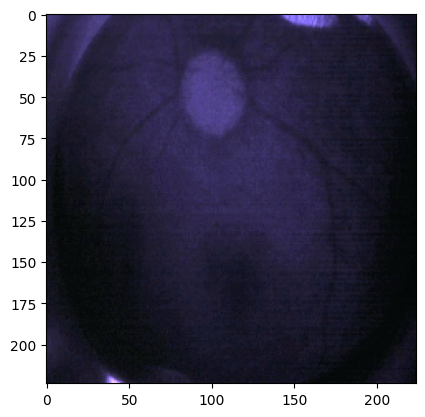

In [ ]:
print(y_test.shape)
print(X_test.shape)
plt.imshow(X_test[0])

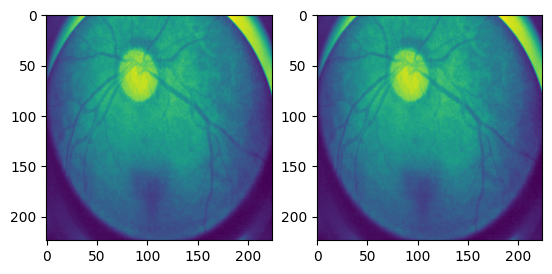

In [ ]:
chan1_y_test = (y_test[:,:,:,0])
chan2_y_test = (y_test[:,:,:,1])
chan3_y_test = (y_test[:,:,:,2])

chan1_X_test = (X_test[:,:,:,0])
chan2_X_test = (X_test[:,:,:,1])
chan3_X_test = (X_test[:,:,:,2])

f, axarr = plt.subplots(1,2)
axarr[0].imshow(y_test[1][:,:,0])
axarr[1].imshow(chan1_y_test[1])

In [ ]:
r_data2 = r_model.predict(chan1_X_test,verbose = 2)
g_data2 = g_model.predict(chan2_X_test,verbose = 2)
b_data2 = b_model.predict(chan3_X_test,verbose = 2)

np.save('/content/drive/MyDrive/r_datarun2.npy',r_data2)
np.save('/content/drive/MyDrive/g_datarun2.npy',g_data2)
np.save('/content/drive/MyDrive/b_datarun2.npy',b_data2)

1/1 - 3s - 3s/epoch - 3s/step
1/1 - 0s - 187ms/epoch - 187ms/step
1/1 - 0s - 118ms/epoch - 118ms/step


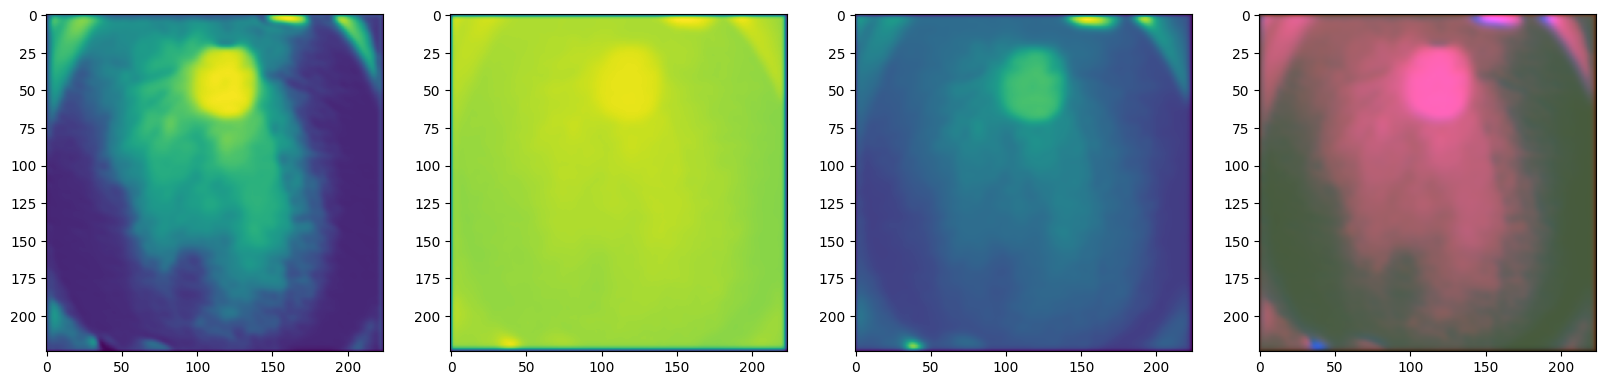

In [ ]:
x_stack = np.dstack((r_data2[1],g_data2[1],b_data2[1]))

f, axarr = plt.subplots(1,4, figsize=(20,8))
axarr[0].imshow(r_data2[1])
axarr[1].imshow(g_data2[1])
axarr[2].imshow(b_data2[1])
axarr[3].imshow(x_stack)

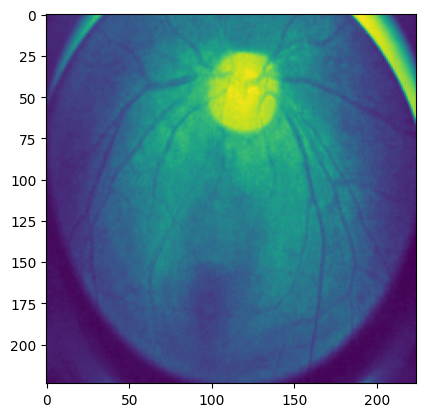

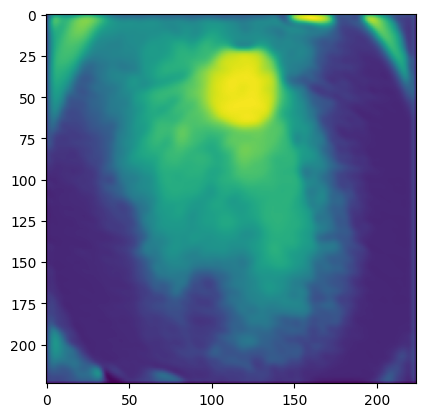

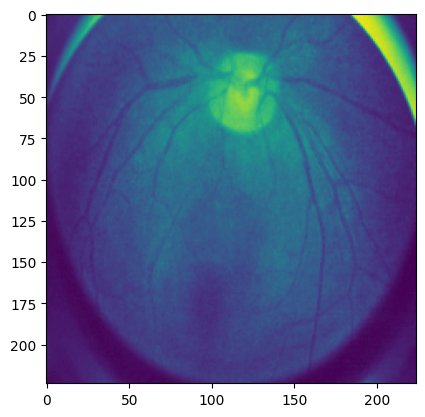

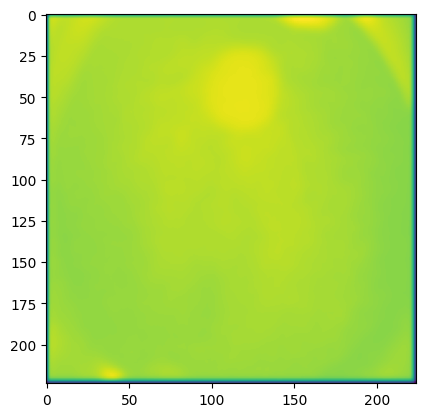

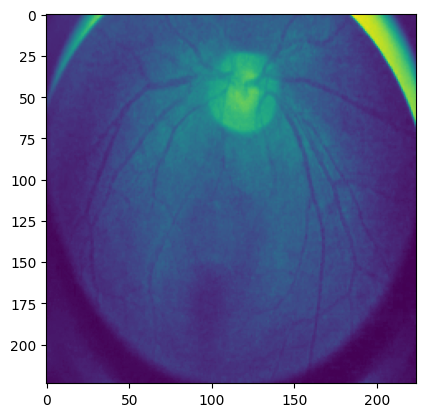

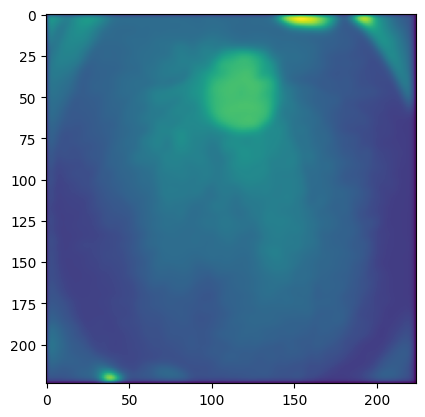

In [ ]:
x = 1
plt.figure(1)
plt.imshow(chan1_y_test[0])
plt.figure(2)
plt.imshow(r_data2[x])
plt.figure(3)
plt.imshow(chan2_y_test[0])
plt.figure(4)
plt.imshow(g_data2[x])
plt.figure(5)
plt.imshow(chan3_y_test[0])
plt.figure(6)
plt.imshow(b_data2[x])

In [ ]:
r_data2[0].shape

(224, 224, 1)